In [1]:
from os import walk

dirpath = "Inference Model";
filenames = next(walk(dirpath), (None, None, []))[2]  # [] if no file
print(filenames)

['C_B307_Brick_Inference.ttl', 'C_B307_DigitalBuilding_Inference.ttl', 'C_B307_Haystack_Inference.ttl', 'C_B307_RECore_Inference.ttl']


In [2]:
from rdflib import Graph as RDFGraph
from rdflib.extras.external_graph_libs import rdflib_to_networkx_digraph

# loadn RDF Graph
dic = {}
for filename in filenames:
    print(filename)
    path = dirpath + "/" + filename
    g = RDFGraph()
    g.parse(path)
    print("rdflib Graph loaded successfully with {} triples".format(len(g)))
    G = rdflib_to_networkx_digraph(g)
    print("networkx Graph loaded successfully with length {}".format(len(G)))
#     G = G.to_undirected()
#     print("networkx Graph to undirected")
    dic.update({str(filename):G})
# print (dic)

C_B307_Brick_Inference.ttl
rdflib Graph loaded successfully with 23009 triples
networkx Graph loaded successfully with length 9465
C_B307_DigitalBuilding_Inference.ttl
rdflib Graph loaded successfully with 9700 triples
networkx Graph loaded successfully with length 8284
C_B307_Haystack_Inference.ttl
rdflib Graph loaded successfully with 2857 triples
networkx Graph loaded successfully with length 1118
C_B307_RECore_Inference.ttl
rdflib Graph loaded successfully with 35592 triples
networkx Graph loaded successfully with length 2314


In [3]:
# show complete node
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [4]:
number_of_nodes = {}
for k, v in dic.items():
    v = v.number_of_nodes()
    number_of_nodes.update({k:v})

number_of_nodes_df = pd.DataFrame(data = number_of_nodes,index=[0])
number_of_nodes_df.head(10)

,C_B307_Brick_Inference.ttl,C_B307_DigitalBuilding_Inference.ttl,C_B307_Haystack_Inference.ttl,C_B307_RECore_Inference.ttl
0,9465,8284,1118,2314


In [5]:
number_of_edges = {}
for k, v in dic.items():
    v = v.number_of_edges()
    number_of_edges.update ({k:v})

number_of_edges_df = pd.DataFrame(data = number_of_edges,index=[0])
number_of_edges_df.head(10)

,C_B307_Brick_Inference.ttl,C_B307_DigitalBuilding_Inference.ttl,C_B307_Haystack_Inference.ttl,C_B307_RECore_Inference.ttl
0,22712,9559,2755,34898


In [6]:
prefix_brick = "http://design-pattern-instance-only.qzc438.com/Brick_1.2.1/C_B307_Brick#"
prefix_haystack = "http://design-pattern-instance-only.qzc438.com/ProjectHaystack/C_B307_Haystack#"
prefix_recore = "http://design-pattern-instance-only.qzc438.com/RealEstateCore/C_B307_RECore#"
prefix_digitalbuilding = "http://design-pattern-instance-only.qzc438.com/GoogleDigitalBuilding/C_B307_DigitalBuilding#"
prefix = [prefix_brick, prefix_haystack, prefix_recore, prefix_digitalbuilding]

### Dan's Paper (degree and class hierarchy/depth)

In [7]:
import networkx as nx

dan_summary_brick_df = pd.DataFrame()
dan_summary_haystack_df = pd.DataFrame()
dan_summary_recore_df = pd.DataFrame()
dan_summary_digitalbuilding_df = pd.DataFrame()

In [8]:
# number of degree
for k, v in dic.items():

    number_of_degree_df = pd.DataFrame(data = v.degree(), 
                                           columns = ["node", "number_of_degree"])
    # filter
    if k == "C_B307_Brick_Inference.ttl":
        number_of_degree_df = number_of_degree_df[number_of_degree_df['node'].str.startswith(prefix_brick)]
        dan_summary_brick_df = number_of_degree_df
    if k == "C_B307_Haystack_Inference.ttl":
        number_of_degree_df = number_of_degree_df[number_of_degree_df['node'].str.startswith(prefix_haystack)]
        dan_summary_haystack_df = number_of_degree_df
    if k == "C_B307_RECore_Inference.ttl":
        number_of_degree_df = number_of_degree_df[number_of_degree_df['node'].str.startswith(prefix_recore)]
        dan_summary_recore_df = number_of_degree_df
    if k == "C_B307_DigitalBuilding_Inference.ttl":
        number_of_degree_df = number_of_degree_df[number_of_degree_df['node'].str.startswith(prefix_digitalbuilding)]
        dan_summary_digitalbuilding_df = number_of_degree_df
#     if k == "C_B307_test.ttl":
#         numbr_of_degree_df = numbr_of_degree_df[numbr_of_degree_df['node'].str.startswith(prefix_test)]
    
    # sort
    number_of_degree_df = number_of_degree_df.sort_values("number_of_degree", ascending = False)
    # reset index
    number_of_degree_df = number_of_degree_df.reset_index(drop=True)
    
    # print
    print ("file:", k)
    print("data points", len(number_of_degree_df.index))
    print (number_of_degree_df.head(10))
    print ("====================================================================================================")

file: C_B307_Brick_Inference.ttl
data points 226
                                                                               node  \
0   http://design-pattern-instance-only.qzc438.com/Brick_1.2.1/C_B307_Brick#Boiler1   
1  http://design-pattern-instance-only.qzc438.com/Brick_1.2.1/C_B307_Brick#Chiller1   
2    http://design-pattern-instance-only.qzc438.com/Brick_1.2.1/C_B307_Brick#AHU_G1   
3    http://design-pattern-instance-only.qzc438.com/Brick_1.2.1/C_B307_Brick#AHU_F2   
4    http://design-pattern-instance-only.qzc438.com/Brick_1.2.1/C_B307_Brick#AHU_B1   
5    http://design-pattern-instance-only.qzc438.com/Brick_1.2.1/C_B307_Brick#AHU_F1   
6    http://design-pattern-instance-only.qzc438.com/Brick_1.2.1/C_B307_Brick#AHU_G2   
7    http://design-pattern-instance-only.qzc438.com/Brick_1.2.1/C_B307_Brick#FCU_B2   
8    http://design-pattern-instance-only.qzc438.com/Brick_1.2.1/C_B307_Brick#FCU_B4   
9    http://design-pattern-instance-only.qzc438.com/Brick_1.2.1/C_B307_Brick#FCU_

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

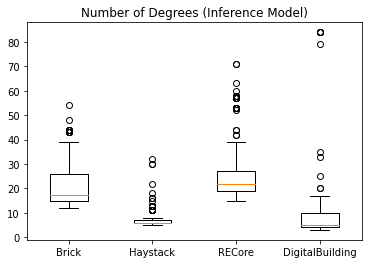

In [10]:
x1 = dan_summary_brick_df.number_of_degree
x2 = dan_summary_haystack_df.number_of_degree
x3 = dan_summary_recore_df.number_of_degree
x4 = dan_summary_digitalbuilding_df.number_of_degree
plt.boxplot ([x1,x2,x3,x4])
plt.xticks([1,2,3,4], ['Brick','Haystack','RECore','DigitalBuilding'])
plt.title ("Number of Degrees (Inference Model)")
plt.savefig('Number of Degrees-Inference.jpg', bbox_inches='tight', dpi=500)

In [11]:
from rdflib import URIRef

# class hierarchy
for k, v in dic.items():
    
    path = dict(nx.shortest_path_length (v))
    
    # filter
    if k == "C_B307_Brick_Inference.ttl":        
        
        root = URIRef('http://design-pattern-instance-only.qzc438.com/Brick_1.2.1/C_B307_Brick#Building307')
            
        class_hierarchy_df = pd.DataFrame.from_dict(data = path[root], orient='index', columns = ["class_hierarchy"])
        class_hierarchy_df.index.rename('node', inplace=True)
        class_hierarchy_df = class_hierarchy_df.reset_index()
        # filter
        class_hierarchy_df = class_hierarchy_df[class_hierarchy_df['node'].str.startswith(prefix_brick)]
        # sort
        class_hierarchy_df = class_hierarchy_df.sort_values("class_hierarchy", ascending = False)
        # reset index
        class_hierarchy_df = class_hierarchy_df.reset_index(drop=True)
        # merge
        dan_summary_brick_df = class_hierarchy_df

    
    if k == "C_B307_Haystack_Inference.ttl":   
        
        root = URIRef('http://design-pattern-instance-only.qzc438.com/ProjectHaystack/C_B307_Haystack#Building307')
        
        class_hierarchy_df = pd.DataFrame.from_dict(data = path[root], orient='index', columns = ["class_hierarchy"])
        class_hierarchy_df.index.rename('node', inplace=True)
        class_hierarchy_df = class_hierarchy_df.reset_index()
        # filter
        class_hierarchy_df = class_hierarchy_df[class_hierarchy_df['node'].str.startswith(prefix_haystack)]
        # sort
        class_hierarchy_df = class_hierarchy_df.sort_values("class_hierarchy", ascending = False)
        # reset index
        class_hierarchy_df = class_hierarchy_df.reset_index(drop=True)
        # merge
        dan_summary_haystack_df = class_hierarchy_df
        
    
    if k == "C_B307_RECore_Inference.ttl":
        
        path = dict(nx.shortest_path_length (v))
        root = URIRef('http://design-pattern-instance-only.qzc438.com/RealEstateCore/C_B307_RECore#Building307')
#         print (path[root])

        class_hierarchy_df = pd.DataFrame.from_dict(data = path[root], orient='index', columns = ["class_hierarchy"])
    
        class_hierarchy_df.index.rename('node', inplace=True)
        class_hierarchy_df = class_hierarchy_df.reset_index()
        # filter
        class_hierarchy_df = class_hierarchy_df[class_hierarchy_df['node'].str.startswith(prefix_recore)]
        # sort
        class_hierarchy_df = class_hierarchy_df.sort_values("class_hierarchy", ascending = False)
        # reset index
        class_hierarchy_df = class_hierarchy_df.reset_index(drop=True)
        # merge
        dan_summary_recore_df = class_hierarchy_df
        
    if k == "C_B307_DigitalBuilding_Inference.ttl":        

        root = URIRef('http://design-pattern-instance-only.qzc438.com/GoogleDigitalBuilding/C_B307_DigitalBuilding#Building307')

        class_hierarchy_df = pd.DataFrame.from_dict(data = path[root], orient='index', columns = ["class_hierarchy"])
        
        class_hierarchy_df.index.rename('node', inplace=True)
        class_hierarchy_df = class_hierarchy_df.reset_index()
        # filter
        class_hierarchy_df = class_hierarchy_df[class_hierarchy_df['node'].str.startswith(prefix_digitalbuilding)]
        # sort
        class_hierarchy_df = class_hierarchy_df.sort_values("class_hierarchy", ascending = False)
        # reset index
        class_hierarchy_df = class_hierarchy_df.reset_index(drop=True)
        # merge
        dan_summary_digitalbuilding_df = class_hierarchy_df
    
    # print
    print ("file:", k)
    print("data points", len(class_hierarchy_df.index))
    print (class_hierarchy_df.head(10))
    print ("====================================================================================================")

file: C_B307_Brick_Inference.ttl
data points 226
                                                                                          node  \
0        http://design-pattern-instance-only.qzc438.com/Brick_1.2.1/C_B307_Brick#FCU_B4_HtgVlv   
1               http://design-pattern-instance-only.qzc438.com/Brick_1.2.1/C_B307_Brick#FCU_B3   
2         http://design-pattern-instance-only.qzc438.com/Brick_1.2.1/C_B307_Brick#AC_F5_HtgVlv   
3     http://design-pattern-instance-only.qzc438.com/Brick_1.2.1/C_B307_Brick#FCU_F7_SupplyFan   
4        http://design-pattern-instance-only.qzc438.com/Brick_1.2.1/C_B307_Brick#AC_G4_CHWCoil   
5     http://design-pattern-instance-only.qzc438.com/Brick_1.2.1/C_B307_Brick#AHU_F2_SupplyFan   
6                http://design-pattern-instance-only.qzc438.com/Brick_1.2.1/C_B307_Brick#AC_F5   
7        http://design-pattern-instance-only.qzc438.com/Brick_1.2.1/C_B307_Brick#FCU_F7_Filter   
8     http://design-pattern-instance-only.qzc438.com/Brick_1.2.1/C_B3

([<matplotlib.axis.XTick at 0x28a6ea50ac8>,
 [Text(1, 0, 'Brick'),
  Text(2, 0, 'Haystack'),
  Text(3, 0, 'RECore'),
  Text(4, 0, 'DigitalBuilding')])

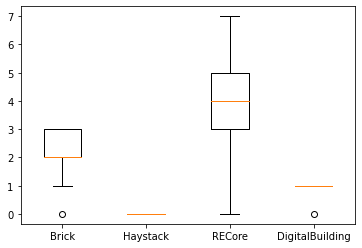

In [12]:
x1 = dan_summary_brick_df.class_hierarchy
x2 = dan_summary_haystack_df.class_hierarchy
x3 = dan_summary_recore_df.class_hierarchy
x4 = dan_summary_digitalbuilding_df.class_hierarchy
plt.boxplot ([x1,x2,x3,x4])
plt.xticks([1,2,3,4], ['Brick','Haystack','RECore','DigitalBuilding'])